# Pairwise FST and genetic diversity in *Ostrea lurida*
This notebook details how I calculate and plot pairwise F<sub>ST</sub>, run a Mantel test to detect isolation-by-distance, and characterize the genetic diversity within populations and within phylogeographic regions. I do this for the full combined dataset, then again for the outlier and neutral datasets (so it is a little repetetive).  
The inputs are *genind* objects and *hierfstat* objects that were previously saved to files. Pairwise F<sub>ST</sub>, popgen statistics (Ho, He, overall F<sub>ST</sub>, F<sub>IS</sub>) are calculated using the [*hierfstat*](https://cran.r-project.org/web/packages/hierfstat/hierfstat.pdf) package. A Mantel test is done using [*adegenet*](http://adegenet.r-forge.r-project.org/files/tutorial-basics.pdf) with a CSV file of pairwise water distance between populations.

In [1]:
library("adegenet") #For storing genotype data
library(hierfstat) #For calculating pairwise Fst
library(ggplot2) #For plotting
library(reshape2) #For plotting
library(plyr)
library("cowplot") #For plotting manuscript figs

Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘hierfstat’

The following object is masked from ‘package:adegenet’:

    read.fstat


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## Neutral
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [2]:
load("../Inputs/OL-c85t10-x45m75-maf025-neutI2-filt.hf")
load("../Inputs/OL-c85t10-x45m75-maf025-neutI2-filt.genind")

In [3]:
stratted.filt

/// GENIND OBJECT /////////

 // 117 individuals; 13,073 loci; 26,146 alleles; size: 18.8 Mb

 // Basic content
   @tab:  117 x 26146 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 26146 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


The *hierfstat* object created by the radiator package does not keep population names, so you have to provide those for plotting. Be CERTAIN that the below order is the same as the order you provided to radiator when you created the *hierfstat* object, or else you will have a mislabelled plot.

In [1]:
pop_order <- c("Klaskino_BC","Barkley_BC","Ladysmith_BC","Victoria_BC","Discovery_WA","Liberty_WA","TritonCove_WA","NorthBay_WA","Willapa_WA","Netarts_OR","Yaquina_OR","Coos_OR","Humboldt_CA","Tomales_CA","NorthSanFran_CA","SouthSanFran_CA","Elkhorn_CA","MuguLagoon_CA","SanDiego_CA")

### Pairwise Fst

In [5]:
# This takes a long time (~30+ minutes) for this many loci and populations. Be patient.
fst.mat <- genet.dist(hf.filt, method = "WC84")

In [6]:
gindF.fst.mat.triN <- as.matrix(fst.mat)
colnames(gindF.fst.mat.triN) <- pop_order
rownames(gindF.fst.mat.triN) <- pop_order
## save to a file, so you don't have to wait forever again
write.table(gindF.fst.mat.triN, file="OL-t10x45m75-maf025-NeutI2-Pop.pwfst",row.names = T,col.names = T)

In [15]:
# in case you are reading in from file
#gindF.fst.mat.triN <- as.matrix(read.table("OL-t10x45m75-maf025-NeutI2-Pop.pwfst"))

In [16]:
meltedN <- melt(gindF.fst.mat.triN, na.rm =TRUE)

In [17]:
round(gindF.fst.mat.triN,4)

,Klaskino_BC,Barkley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.0000,0.0308,0.0665,0.1192,0.0744,0.0966,0.0753,0.0967,0.1135,0.0822,0.1188,0.1159,0.0917,0.0971,0.1246,0.1255,0.1230,0.1353,0.1419
Barkley_BC,0.0308,0.0000,0.0569,0.1273,0.0770,0.1024,0.0804,0.1053,0.1229,0.0887,0.1306,0.1246,0.0938,0.0941,0.1220,0.1204,0.1136,0.1251,0.1323
Ladysmith_BC,0.0665,0.0569,0.0000,0.0934,0.0384,0.0653,0.0521,0.0753,0.1199,0.0825,0.1279,0.1266,0.0791,0.0888,0.1196,0.1258,0.1109,0.1242,0.1320
Victoria_BC,0.1192,0.1273,0.0934,0.0000,0.0873,0.0867,0.0579,0.0907,0.1251,0.1101,0.1484,0.1340,0.1177,0.1285,0.1556,0.1720,0.1581,0.1700,0.1767
Discovery_WA,0.0744,0.0770,0.0384,0.0873,0.0000,0.0528,0.0180,0.0479,0.1055,0.0804,0.1218,0.1119,0.0887,0.1033,0.1305,0.1421,0.1294,0.1416,0.1448
Liberty_WA,0.0966,0.1024,0.0653,0.0867,0.0528,0.0000,0.0170,0.0079,0.1188,0.0858,0.1381,0.1218,0.0881,0.1166,0.1450,0.1568,0.1433,0.1561,0.1620
TritonCove_WA,0.0753,0.0804,0.0521,0.0579,0.0180,0.0170,0.0000,0.0250,0.0949,0.0707,0.1186,0.1050,0.0772,0.1001,0.1252,0.1350,0.1186,0.1369,0.1397
NorthBay_WA,0.0967,0.1053,0.0753,0.0907,0.0479,0.0079,0.0250,0.0000,0.1144,0.0780,0.1360,0.1191,0.0875,0.1173,0.1458,0.1575,0.1420,0.1591,0.1644
Willapa_WA,0.1135,0.1229,0.1199,0.1251,0.1055,0.1188,0.0949,0.1144,0.0000,0.0646,0.0951,0.0015,0.0932,0.1124,0.1208,0.1364,0.1233,0.1404,0.1482
Netarts_OR,0.0822,0.0887,0.0825,0.1101,0.0804,0.0858,0.0707,0.0780,0.0646,0.0000,0.0310,0.0688,0.0687,0.0819,0.1022,0.1024,0.1004,0.1213,0.1270


In [7]:
#Average pairwise Fst
summary(meltedN$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07066 0.10503 0.09560 0.12727 0.17669 

Plotting using ggplot2

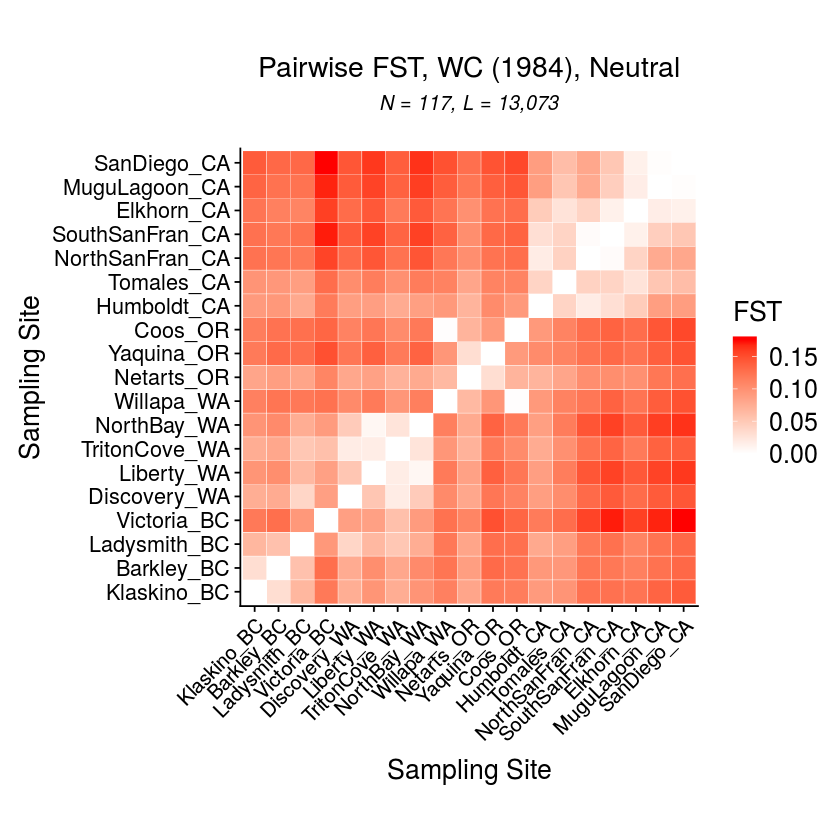

In [10]:
neutral <- ggplot(data = meltedN, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Neutral", atop(italic("N = 117, L = 13,073"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  theme(axis.title = element_text(size = 16),legend.text = element_text(size =15), legend.title = element_text(size =16)) +
  theme(plot.title = element_text(size = 17)) +
coord_fixed()
neutral

### Mantel Test with adegenet

In [18]:
## this file is in the Github repository
x <- as.matrix(read.csv("Ostrea Phylogeography Samples - Water Distance.csv",header = T,row.names = 1))
Dgeo <- as.dist(x)
fst_N <- gindF.fst.mat.triN/(1-gindF.fst.mat.triN)
DgenN <- as.dist(fst_N)
ibd <- mantel.randtest(DgenN,Dgeo)
ibd

Monte-Carlo test
Call: mantel.randtest(m1 = DgenN, m2 = Dgeo)

Observation: 0.7039584 

Based on 999 replicates
Simulated p-value: 0.001 
Alternative hypothesis: greater 

      Std.Obs   Expectation      Variance 
 8.3240948499 -0.0006025662  0.0071641235 

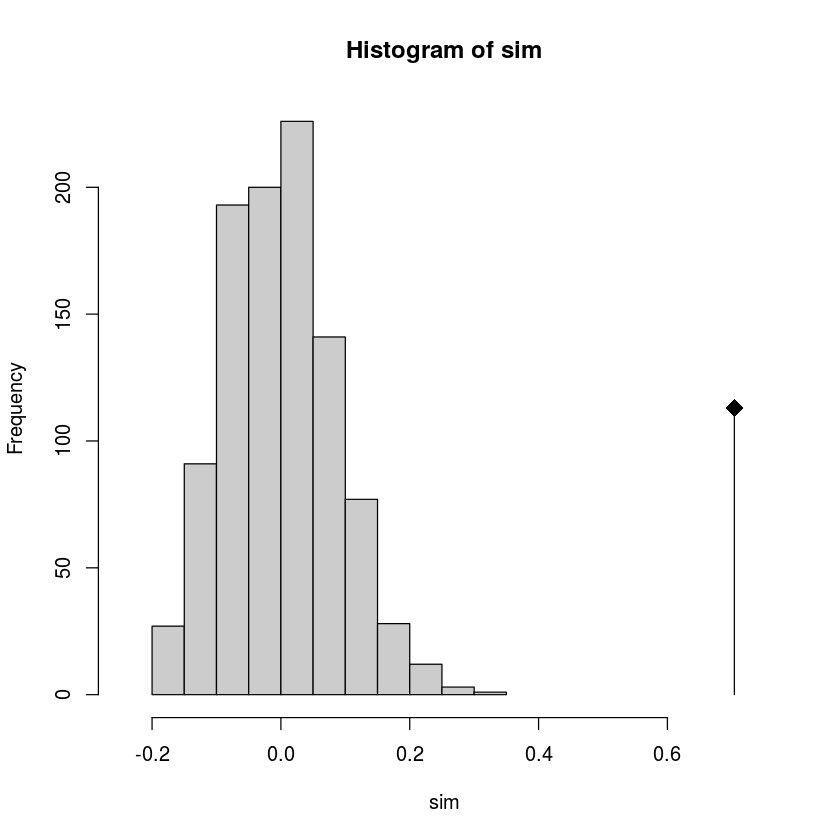

In [19]:
plot(ibd)

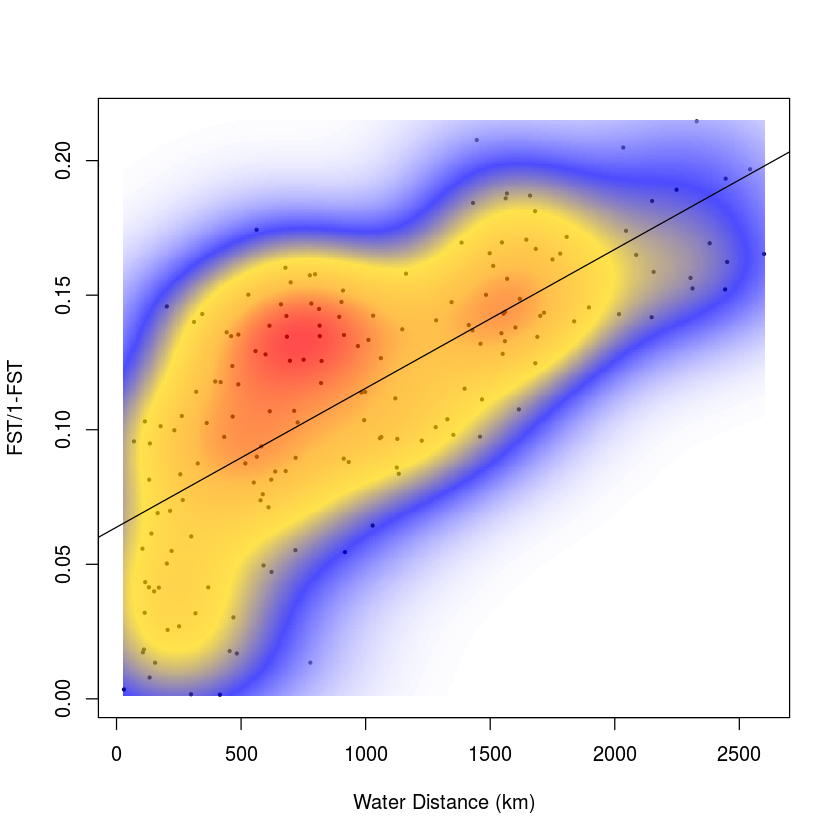

In [20]:
library(MASS)
dens <- kde2d(Dgeo,DgenN, n=300)
myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgeo, DgenN, pch=20,cex=.5,xlab = "Water Distance (km)", ylab = "FST/1-FST")
image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(DgenN~Dgeo))

#### Pairwise Fst on phylogeographic regions

In [14]:
pop_order

[1] "Klaskino_BC"     "Barkley_BC"      "Ladysmith_BC"    "Victoria_BC"    
 [5] "Discovery_WA"    "Liberty_WA"      "TritonCove_WA"   "NorthBay_WA"    
 [9] "Willapa_WA"      "Netarts_OR"      "Yaquina_OR"      "Coos_OR"        
[13] "Humboldt_CA"     "Tomales_CA"      "NorthSanFran_CA" "SouthSanFran_CA"
[17] "Elkhorn_CA"      "MuguLagoon_CA"   "SanDiego_CA"

In [11]:
# make a copy of the hierfstat object
hf.reg <- hf.filt
# relabel individuals by their phylogeographic region
regions <- c("NWBC","NWBC",rep("Puget+BC",6),"Willapa","Oregon","Oregon","Willapa",rep("NoCal",4),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), to = regions)

In [34]:
# calculate pairwise Fst
fst.mat.reg.N <- genet.dist(hf.reg, method = "WC84")

In [35]:
fst.mat.reg.N

              NoCal       NWBC     Oregon   Puget+BC      SoCal
NWBC     0.08262798                                            
Oregon   0.07689077 0.08796600                                 
Puget+BC 0.08730398 0.06302399 0.07983414                      
SoCal    0.05064449 0.11544675 0.11250080 0.13575655           
Willapa  0.09434948 0.11016371 0.07071239 0.09190872 0.13211117

In [36]:
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
gindF.fst.mat.triR <- as.matrix(fst.mat.reg.N)
gindF.fst.mat.triR <- gindF.fst.mat.triR[NS,NS]

In [37]:
gindF.fst.mat.triR

,NWBC,Puget+BC,Willapa,Oregon,NoCal,SoCal
NWBC,0.00000000,0.06302399,0.11016371,0.08796600,0.08262798,0.11544675
Puget+BC,0.06302399,0.00000000,0.09190872,0.07983414,0.08730398,0.13575655
Willapa,0.11016371,0.09190872,0.00000000,0.07071239,0.09434948,0.13211117
Oregon,0.08796600,0.07983414,0.07071239,0.00000000,0.07689077,0.11250080
NoCal,0.08262798,0.08730398,0.09434948,0.07689077,0.00000000,0.05064449
SoCal,0.11544675,0.13575655,0.13211117,0.11250080,0.05064449,0.00000000


In [38]:
write.table(gindF.fst.mat.triR, file="OL-t10x45m75-maf025-NeutI2-Reg.pwfst",row.names = T,col.names = T)

meltedN_reg <- melt(gindF.fst.mat.triR, na.rm =TRUE)

In [68]:
#gindF.fst.mat.tri <- as.matrix(read.table("OL-t10x45m75-maf025-NeutI2-Reg.pwfst"))

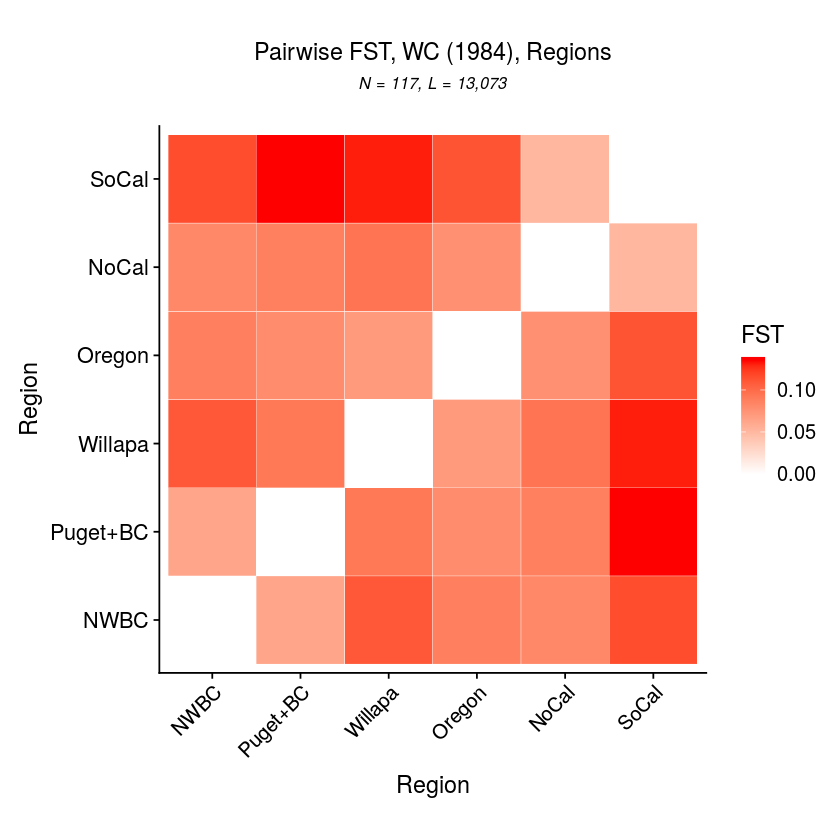

In [39]:
# plot
neut_reg <- ggplot(data = meltedN_reg, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Regions", atop(italic("N = 117, L = 13,073"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()
neut_reg

### Genetic diversity (observed and expected heterozygosity)

In [16]:
# Genind object previously loaded
stratted.filt

/// GENIND OBJECT /////////

 // 117 individuals; 13,073 loci; 26,146 alleles; size: 18.8 Mb

 // Basic content
   @tab:  117 x 26146 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 26146 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


In [17]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

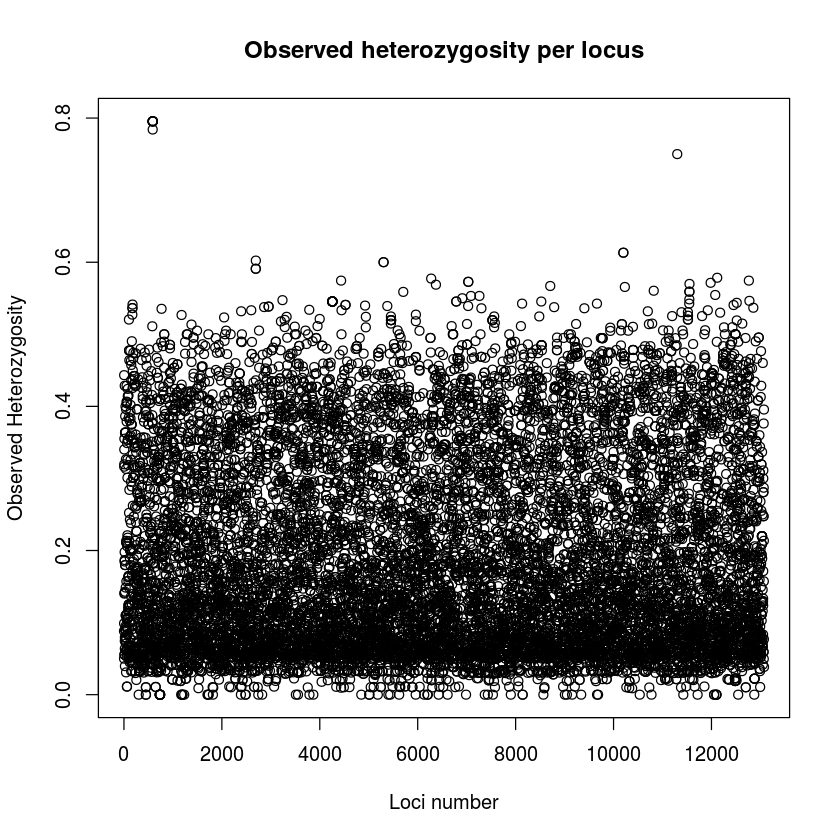

In [18]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

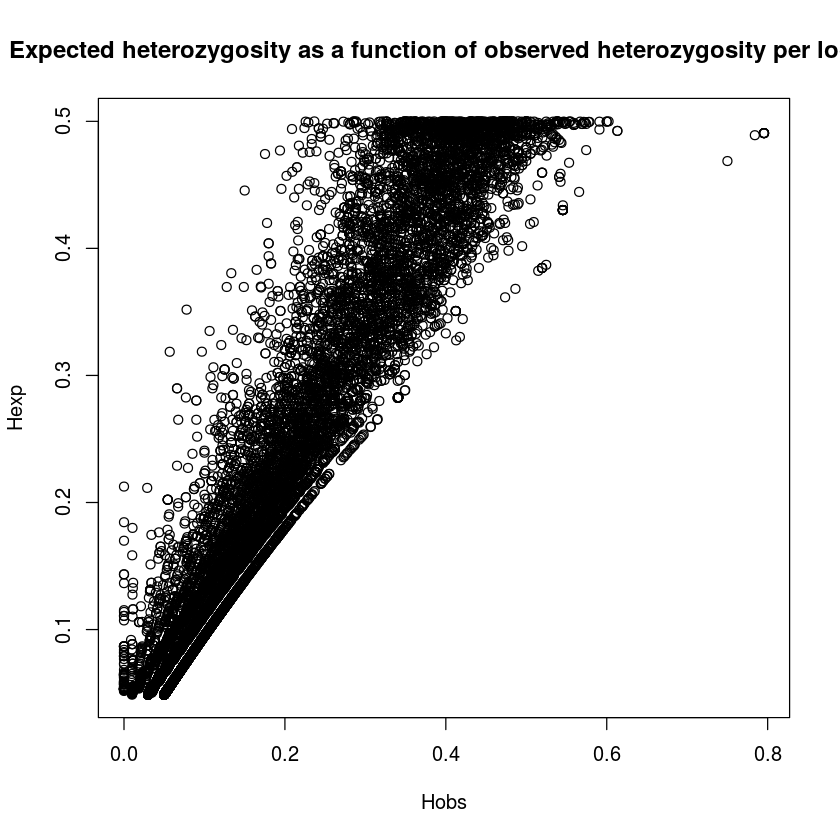

In [19]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [20]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 136.58, df = 1, p-value < 2.2e-16


Significant difference between observed and expected heterozygosity

In [21]:
# calculate basic popgen statistics for the overall dataset
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [22]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.192
Hs,0.202
Ht,0.224
Dst,0.022
Htp,0.225
Dstp,0.023
Fst,0.097
Fstp,0.102
Fis,0.051
Dest,0.029


In [23]:
# get bootstrap confidence values for Fis
boot <- boot.ppfis(hf.filt,nboot = 1000)
boot5 <- boot.ppfis(hf.filt,nboot = 1000,quant = 0.5)

In [24]:
# add latitude for each population
latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.6131,47.3925,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.95507,37.70867,36.8398194,34.101914,32.602500)

In [25]:
# combine all pop statistics
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino_BC,0.1789725,0.1917364,0.0667,0.0567,0.0761,50.29867
Barkley_BC,0.1746585,0.1877104,0.0685,0.0547,0.0809,49.01585
Ladysmith_BC,0.1990626,0.1905563,-0.0540,-0.0677,-0.0385,49.01138
Victoria_BC,0.1639013,0.1732017,0.0525,0.0413,0.0637,48.43567
Discovery_WA,0.1711079,0.1818237,0.0586,0.0474,0.0696,47.99780
Liberty_WA,0.1732429,0.1783568,0.0283,0.0170,0.0400,47.73750
TritonCove_WA,0.1767978,0.1834648,0.0361,0.0229,0.0493,47.61310
NorthBay_WA,0.1674510,0.1770120,0.0538,0.0413,0.0653,47.39250
Willapa_WA,0.1704562,0.1807266,0.0562,0.0434,0.0690,46.53239
Netarts_OR,0.1860540,0.1976108,0.0579,0.0464,0.0686,45.39116


What is mean FIS across populations?

In [26]:

summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.09420  0.03030  0.05380  0.04199  0.06265  0.12910 

Plot latitude agaiinst expected heterozygosity

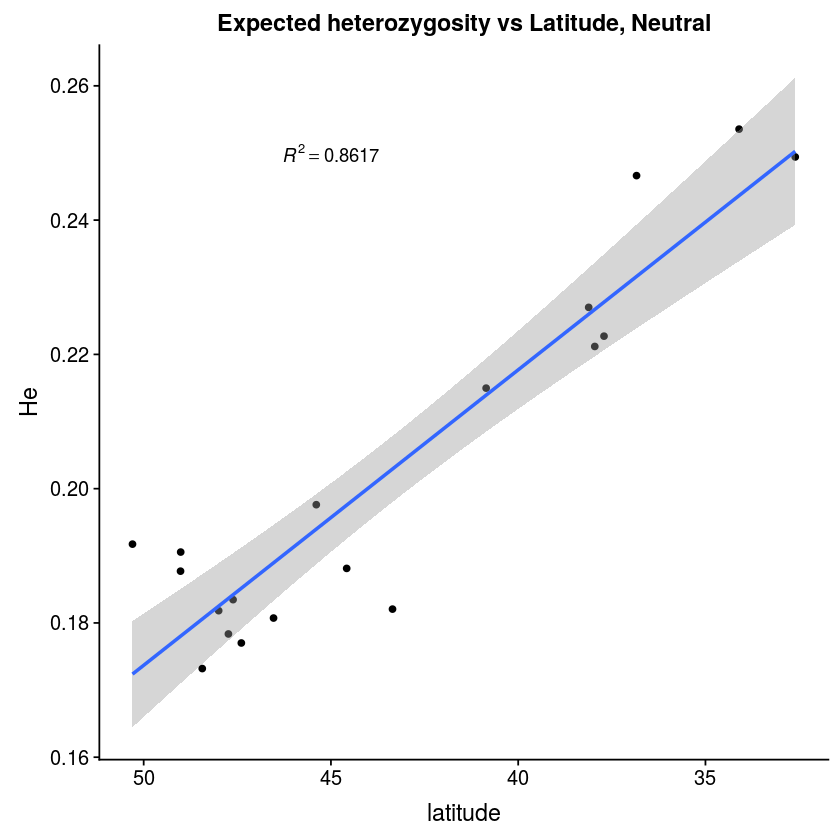

In [27]:
R2 = round(summary(lm(x$He ~ x$latitude))$r.squared, 4)             

ggplot(x, aes(x = latitude, y = He)) + geom_point() + 
geom_smooth(method=lm) + 
ggtitle("Expected heterozygosity vs Latitude, Neutral") +
annotate(geom = "text", label=paste("italic(R^2)==",R2), x=45, y=0.25, parse=T) +
scale_x_reverse()

#### Popgen stats for regions

In [28]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 3) 

In [29]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.191
Hs,0.207
Ht,0.225
Dst,0.018
Htp,0.228
Dstp,0.022
Fst,0.080
Fstp,0.094
Fis,0.076
Dest,0.027


In [30]:
boot <- boot.ppfis(hf.reg,nboot = 1000)
boot5 <- boot.ppfis(hf.reg,nboot = 1000,quant = 0.5)

In [31]:
# subset hierfstat object into individual regions
nwbc <- hf.filt[which(hf.filt$POP_ID %in% c(1,2)),]
puget <- hf.filt[which(hf.filt$POP_ID %in% c(3:8)),]
willapa <- hf.filt[which(hf.filt$POP_ID %in% c(9,12)),]
oregon <- hf.filt[which(hf.filt$POP_ID %in% c(10,11)),]
Nocal <- hf.filt[which(hf.filt$POP_ID %in% c(13:16)),]
Socal <- hf.filt[which(hf.filt$POP_ID %in% c(17:19)),]

In [32]:
# get stats for each region separately
nwbc <- basic.stats(nwbc, digits = 3)
puget <- basic.stats(puget, digits = 3)
willapa <- basic.stats(willapa, digits = 3)
oregon <- basic.stats(oregon, digits = 3)
Nocal <- basic.stats(Nocal, digits = 3)
Socal <- basic.stats(Socal, digits = 3)

In [33]:
fst <- c(nwbc$overall[7],puget$overall[7],willapa$overall[7],oregon$overall[7],Nocal$overall[7],Socal$overall[7])

In [34]:
# make table of stats for each regiom
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
x <- x[NS,]
cbind(x,fst)

,Ho,He,Fis,ll,hl,fst
NWBC,0.1775732,0.1932943,0.0819,0.0738,0.0893,0.016
Puget+BC,0.1734851,0.1886358,0.0804,0.0750,0.0855,0.046
Willapa,0.1713611,0.1816749,0.0566,0.0481,0.0653,0.001
Oregon,0.1852967,0.1960345,0.0548,0.0465,0.0640,0.016
NoCal,0.2147087,0.2267281,0.0529,0.0475,0.0584,0.022
SoCal,0.2235033,0.2525296,0.1149,0.1091,0.1210,0.007


## Outlier
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [2]:
load("../Inputs/OL-c85t10-x45m75-maf025-outI2Union-filt.hf")
load("../Inputs/OL-c85t10-x45m75-maf025-outI2Union-filt.genind")

In [3]:
stratted.filt

Loading required package: adegenet
Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




/// GENIND OBJECT /////////

 // 117 individuals; 235 loci; 470 alleles; size: 368.2 Kb

 // Basic content
   @tab:  117 x 470 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 470 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


### Pairwise Fst

In [5]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.matO <- genet.dist(hf.filt, method = "WC84")

In [6]:
gindF.fst.mat.triO <- as.matrix(fst.matO)
colnames(gindF.fst.mat.triO) <- pop_order
rownames(gindF.fst.mat.triO) <- pop_order
write.table(gindF.fst.mat.triO, file="OL-t10x45m75-maf025-outI2Union-Pop.pwfst",row.names = T,col.names = T)

In [34]:
gindF.fst.mat.triO <- as.matrix(read.table("OL-t10x45m75-maf025-outI2Union-Pop.pwfst"))

In [7]:
meltedO <- melt(gindF.fst.mat.triO, na.rm =TRUE)

In [8]:
round(gindF.fst.mat.triO,4)

,Klaskino_BC,Barkley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.0000,0.0660,0.1848,0.4565,0.2161,0.3705,0.3817,0.3863,0.4510,0.4119,0.4554,0.4497,0.4659,0.3696,0.5057,0.4822,0.4782,0.5749,0.5744
Barkley_BC,0.0660,0.0000,0.0990,0.3553,0.1151,0.2820,0.2981,0.2874,0.4372,0.3803,0.4401,0.4396,0.4289,0.3283,0.4690,0.4257,0.4275,0.5378,0.5313
Ladysmith_BC,0.1848,0.0990,0.0000,0.3192,0.0804,0.1894,0.1886,0.2008,0.4018,0.3214,0.3936,0.3987,0.3807,0.3357,0.4456,0.4303,0.4407,0.5490,0.5471
Victoria_BC,0.4565,0.3553,0.3192,0.0000,0.2707,0.1837,0.1616,0.1777,0.5178,0.3964,0.4739,0.5085,0.5065,0.4652,0.5594,0.5647,0.5410,0.6299,0.6320
Discovery_WA,0.2161,0.1151,0.0804,0.2707,0.0000,0.1306,0.1336,0.1090,0.3687,0.3247,0.4003,0.3737,0.4316,0.3636,0.4951,0.4762,0.4716,0.5760,0.5758
Liberty_WA,0.3705,0.2820,0.1894,0.1837,0.1306,0.0000,0.0398,0.0109,0.4915,0.3686,0.4548,0.4934,0.4681,0.4571,0.5467,0.5484,0.5444,0.6278,0.6278
TritonCove_WA,0.3817,0.2981,0.1886,0.1616,0.1336,0.0398,0.0000,0.0524,0.4768,0.3832,0.4589,0.4808,0.4676,0.4369,0.5366,0.5446,0.5343,0.6190,0.6194
NorthBay_WA,0.3863,0.2874,0.2008,0.1777,0.1090,0.0109,0.0524,0.0000,0.4871,0.3678,0.4515,0.4839,0.4614,0.4443,0.5298,0.5416,0.5341,0.6228,0.6308
Willapa_WA,0.4510,0.4372,0.4018,0.5178,0.3687,0.4915,0.4768,0.4871,0.0000,0.1496,0.2160,0.0090,0.4397,0.3772,0.4958,0.4800,0.4457,0.5608,0.5700
Netarts_OR,0.4119,0.3803,0.3214,0.3964,0.3247,0.3686,0.3832,0.3678,0.1496,0.0000,0.0453,0.1328,0.3945,0.3299,0.4557,0.4352,0.4341,0.5531,0.5466


In [35]:
gindF.fst.mat.triO

,Klaskino_BC,Barkley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.00000000,0.06601262,0.18482148,0.4565040,0.2160958,0.37050533,0.38171104,0.38631940,0.451000526,0.41190082,0.45537269,0.449702805,0.46592106,0.3696151,0.50571664,0.48218537,0.4781804,0.57488777,0.57435067
Barkley_BC,0.06601262,0.00000000,0.09899752,0.3553035,0.1151173,0.28201274,0.29808061,0.28740783,0.437159908,0.38032628,0.44014618,0.439590145,0.42889915,0.3283316,0.46904889,0.42572676,0.4274945,0.53775381,0.53135000
Ladysmith_BC,0.18482148,0.09899752,0.00000000,0.3192229,0.0804419,0.18938034,0.18863996,0.20083202,0.401818420,0.32135759,0.39360589,0.398702532,0.38073194,0.3357208,0.44555344,0.43034026,0.4407330,0.54904146,0.54712539
Victoria_BC,0.45650401,0.35530346,0.31922295,0.0000000,0.2706676,0.18366962,0.16157901,0.17765145,0.517751923,0.39643696,0.47386729,0.508487102,0.50645256,0.4652347,0.55935035,0.56467338,0.5409568,0.62989734,0.63204959
Discovery_WA,0.21609577,0.11511733,0.08044190,0.2706676,0.0000000,0.13055904,0.13356619,0.10900387,0.368683855,0.32471375,0.40025108,0.373690970,0.43156963,0.3636375,0.49514658,0.47620977,0.4715591,0.57604257,0.57584385
Liberty_WA,0.37050533,0.28201274,0.18938034,0.1836696,0.1305590,0.00000000,0.03984117,0.01093450,0.491494135,0.36862732,0.45476525,0.493440699,0.46814434,0.4570659,0.54665498,0.54838761,0.5444049,0.62778992,0.62783381
TritonCove_WA,0.38171104,0.29808061,0.18863996,0.1615790,0.1335662,0.03984117,0.00000000,0.05236205,0.476782799,0.38319130,0.45887072,0.480756489,0.46762219,0.4368639,0.53663795,0.54458537,0.5342809,0.61899943,0.61938251
NorthBay_WA,0.38631940,0.28740783,0.20083202,0.1776514,0.1090039,0.01093450,0.05236205,0.00000000,0.487143726,0.36782236,0.45151892,0.483897837,0.46138163,0.4443389,0.52981064,0.54157006,0.5341172,0.62283783,0.63084642
Willapa_WA,0.45100053,0.43715991,0.40181842,0.5177519,0.3686839,0.49149413,0.47678280,0.48714373,0.000000000,0.14958227,0.21602573,0.009048621,0.43973668,0.3771799,0.49583394,0.48000100,0.4456896,0.56084685,0.57004975
Netarts_OR,0.41190082,0.38032628,0.32135759,0.3964370,0.3247138,0.36862732,0.38319130,0.36782236,0.149582275,0.00000000,0.04527838,0.132790861,0.39446566,0.3299180,0.45573922,0.43520563,0.4341081,0.55311022,0.54660938


In [38]:
gindF.fst.mat.triO[upper.tri(gindF.fst.mat.triO, diag = TRUE)] <- NA
round(gindF.fst.mat.triO,4)

,Klaskino_BC,Barkley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Barkley_BC,0.0660,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Ladysmith_BC,0.1848,0.0990,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Victoria_BC,0.4565,0.3553,0.3192,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Discovery_WA,0.2161,0.1151,0.0804,0.2707,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Liberty_WA,0.3705,0.2820,0.1894,0.1837,0.1306,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TritonCove_WA,0.3817,0.2981,0.1886,0.1616,0.1336,0.0398,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NorthBay_WA,0.3863,0.2874,0.2008,0.1777,0.1090,0.0109,0.0524,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Willapa_WA,0.4510,0.4372,0.4018,0.5178,0.3687,0.4915,0.4768,0.4871,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Netarts_OR,0.4119,0.3803,0.3214,0.3964,0.3247,0.3686,0.3832,0.3678,0.1496,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
#Average pairwise Fst
summary(meltedO$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2707  0.4341  0.3722  0.4941  0.6320 

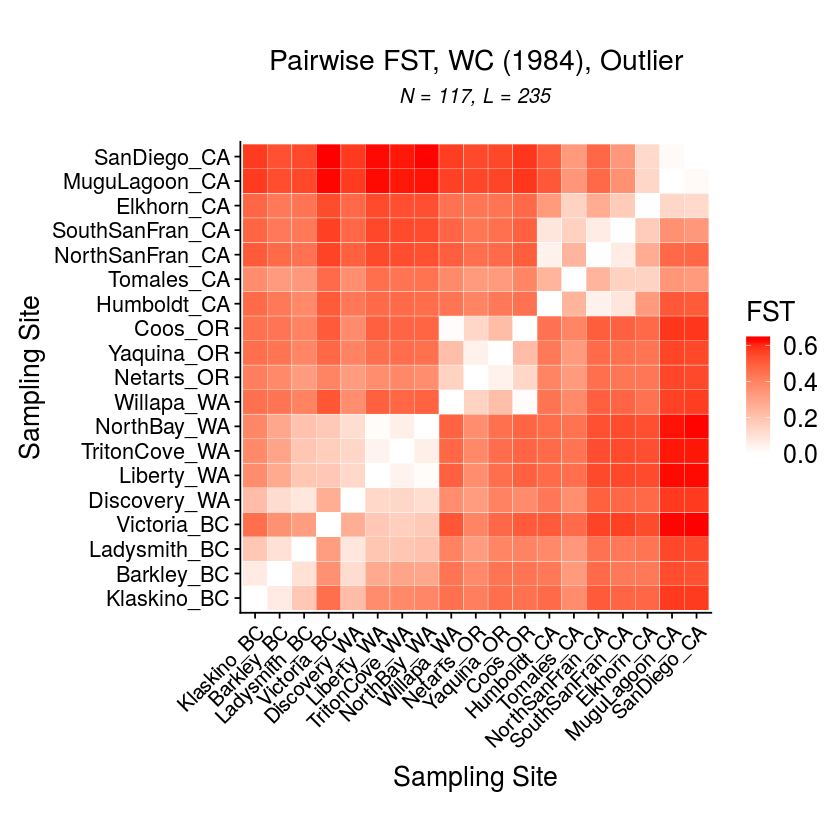

In [10]:
outlier <- ggplot(data = meltedO, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Outlier", atop(italic("N = 117, L = 235"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  theme(axis.title = element_text(size = 16),legend.text = element_text(size =15), legend.title = element_text(size =16)) +
  theme(plot.title = element_text(size = 17)) +
coord_fixed()
outlier

### Mantel Test

In [11]:
x <- as.matrix(read.csv("Ostrea Phylogeography Samples - Water Distance.csv",header = T,row.names = 1))
Dgeo <- as.dist(x)
fst_O <- gindF.fst.mat.triO/(1-gindF.fst.mat.triO)
DgenO <- as.dist(fst_O)
ibd <- mantel.randtest(DgenO,Dgeo)
ibd

Monte-Carlo test
Call: mantel.randtest(m1 = DgenO, m2 = Dgeo)

Observation: 0.8374046 

Based on 999 replicates
Simulated p-value: 0.001 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
9.2631632707 0.0008782806 0.0081553111 

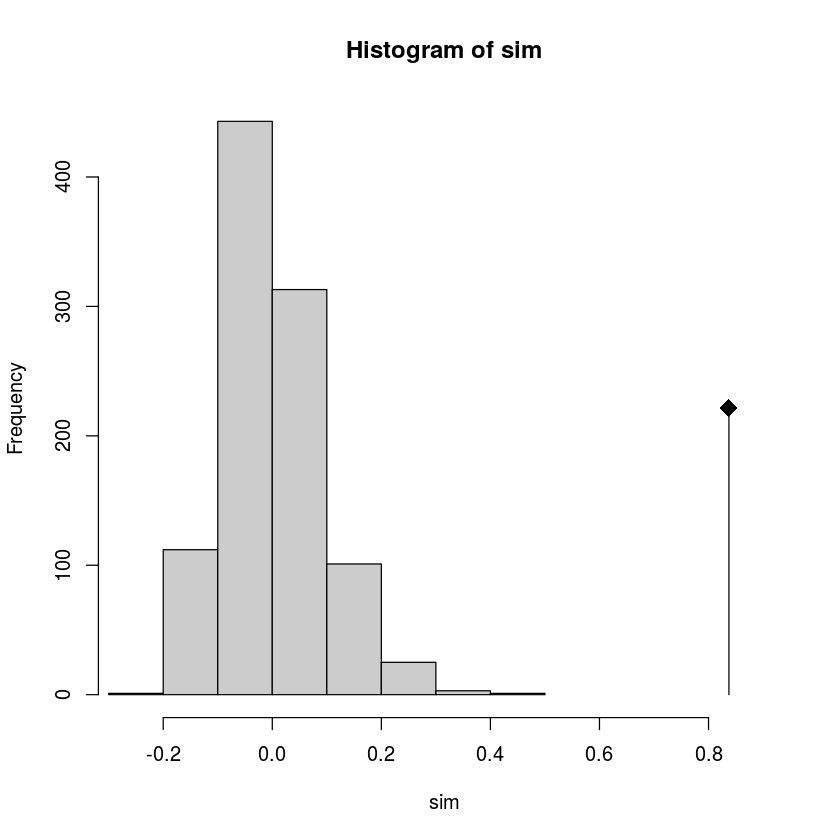

In [12]:
plot(ibd)

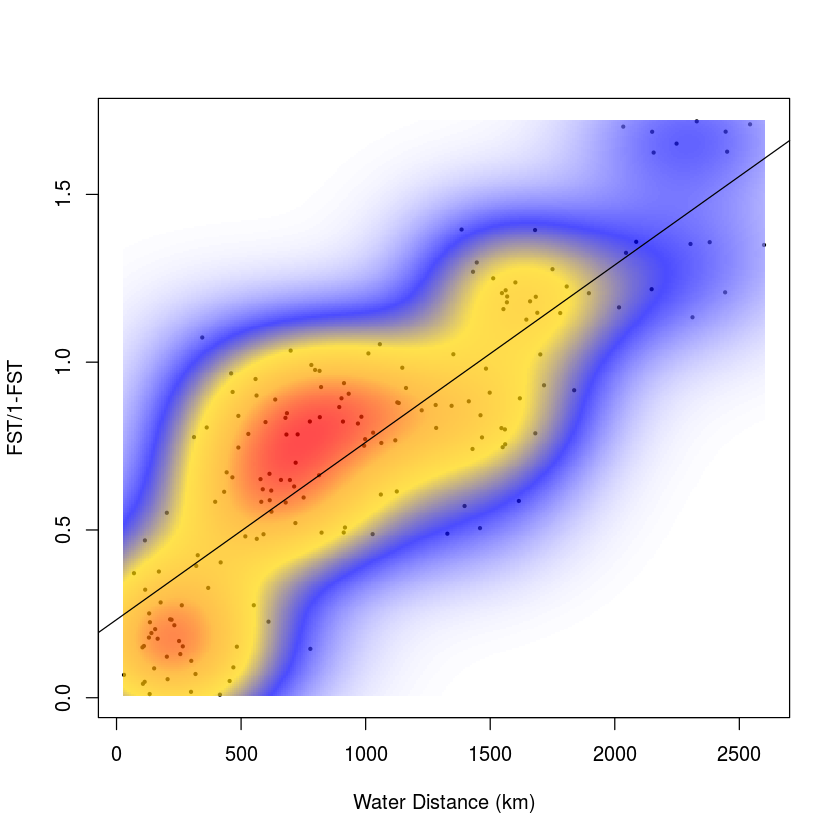

In [13]:
library(MASS)
dens <- kde2d(Dgeo,DgenO, n=300)
myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgeo, DgenO, pch=20,cex=.5,xlab = "Water Distance (km)", ylab = "FST/1-FST")
image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(DgenO~Dgeo))

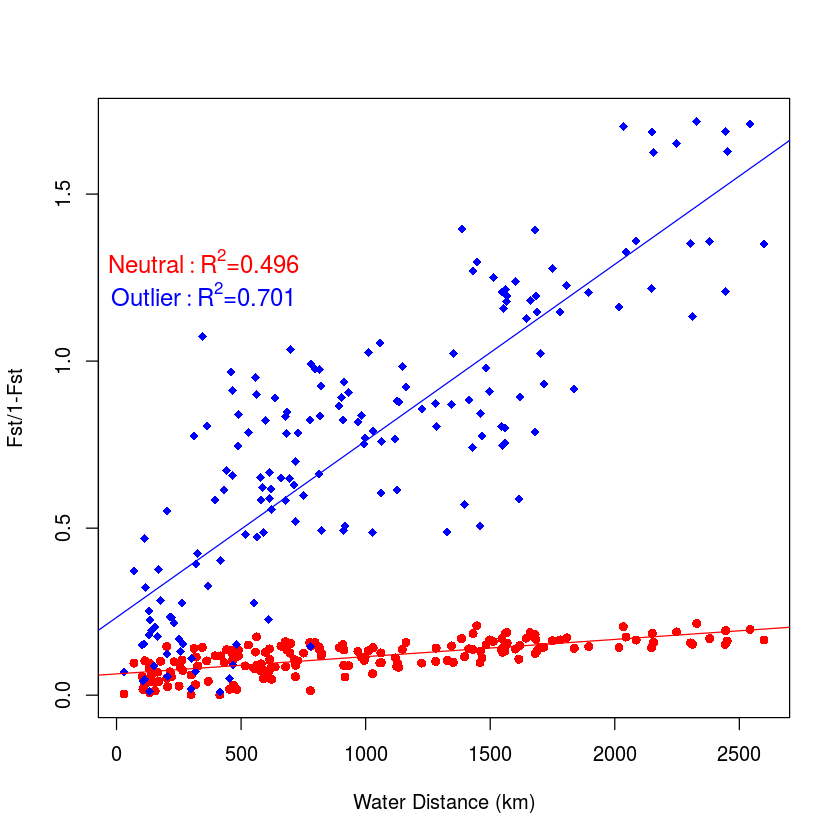

In [21]:
ylim <- range(DgenN, DgenO)

R2N = round(summary(lm(DgenN ~ Dgeo))$r.squared, 3)
R2O = round(summary(lm(DgenO ~ Dgeo))$r.squared, 3)
plot(Dgeo, DgenN, col = "red",ylim = ylim,pch = 16, xlab = "Water Distance (km)", ylab = "Fst/1-Fst")
points(Dgeo, DgenO, col = "blue",pch=18)
text(350,1.2,substitute(paste(Outlier: R^2,"=",r ),list(r=R2O)), col = "blue",cex = 1.2)
text(350,1.3,substitute(paste(Neutral: R^2,"=",r ),list(r=R2N)), col = "red",cex = 1.2)
abline(lm(DgenN~Dgeo),col="red")
abline(lm(DgenO~Dgeo),col="blue")


#### Pairwise Fst on Regions

In [22]:
hf.reg <- hf.filt
regions <- c("NWBC","NWBC",rep("Puget+BC",6),"Willapa","Oregon","Oregon","Willapa",rep("NoCal",4),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), to = regions)

In [23]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg.O <- genet.dist(hf.reg, method = "WC84")

In [24]:
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg.O)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [25]:
gindF.fst.mat.tri

,NWBC,Puget+BC,Willapa,Oregon,NoCal,SoCal
NWBC,0.0000000,0.2599577,0.4331486,0.4067070,0.3438296,0.4832832
Puget+BC,0.2599577,0.0000000,0.4314636,0.3787980,0.4137835,0.5853522
Willapa,0.4331486,0.4314636,0.0000000,0.1661837,0.3670076,0.5054239
Oregon,0.4067070,0.3787980,0.1661837,0.0000000,0.3241900,0.4813565
NoCal,0.3438296,0.4137835,0.3670076,0.3241900,0.0000000,0.3257584
SoCal,0.4832832,0.5853522,0.5054239,0.4813565,0.3257584,0.0000000


In [26]:
write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-OutI2Union-Reg.pwfst",row.names = T,col.names = T)

meltedO_reg <- melt(gindF.fst.mat.tri, na.rm =TRUE)

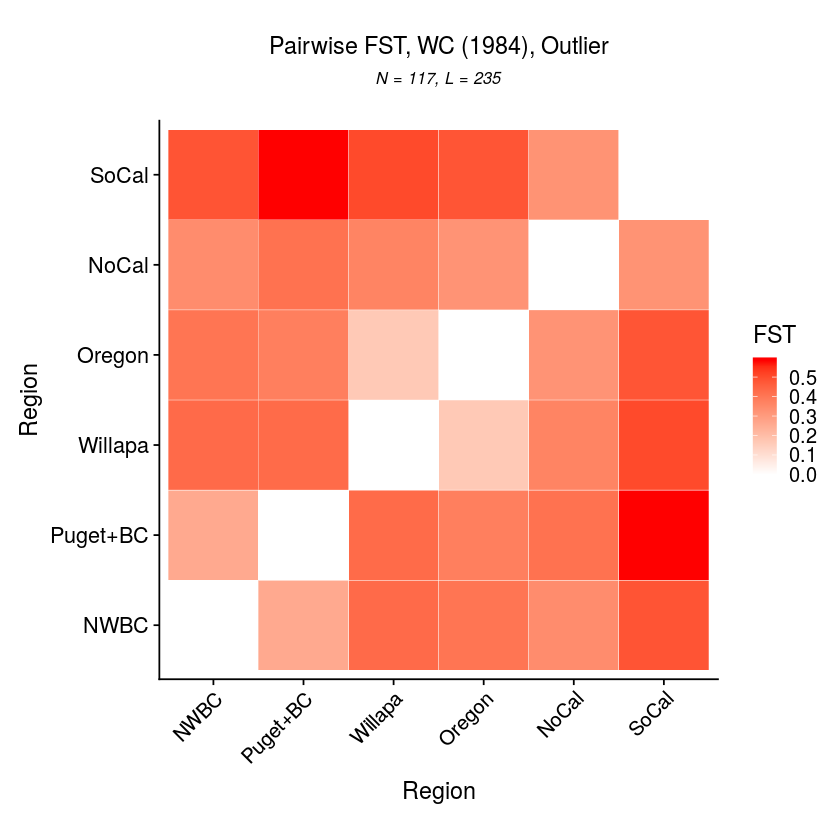

In [27]:
out_reg <- ggplot(data = meltedO_reg, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Outlier", atop(italic("N = 117, L = 235"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()
out_reg

### Genetic diversity (observed and expected heterozygosity)

In [28]:
stratted.filt

/// GENIND OBJECT /////////

 // 117 individuals; 235 loci; 470 alleles; size: 368.2 Kb

 // Basic content
   @tab:  117 x 470 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 470 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


In [29]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

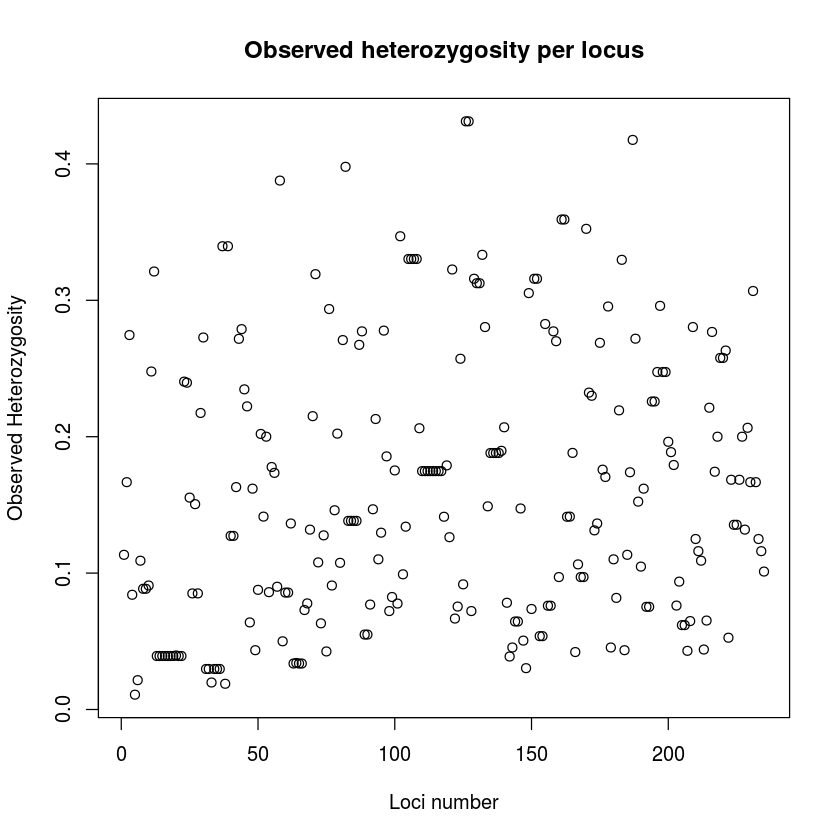

In [30]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

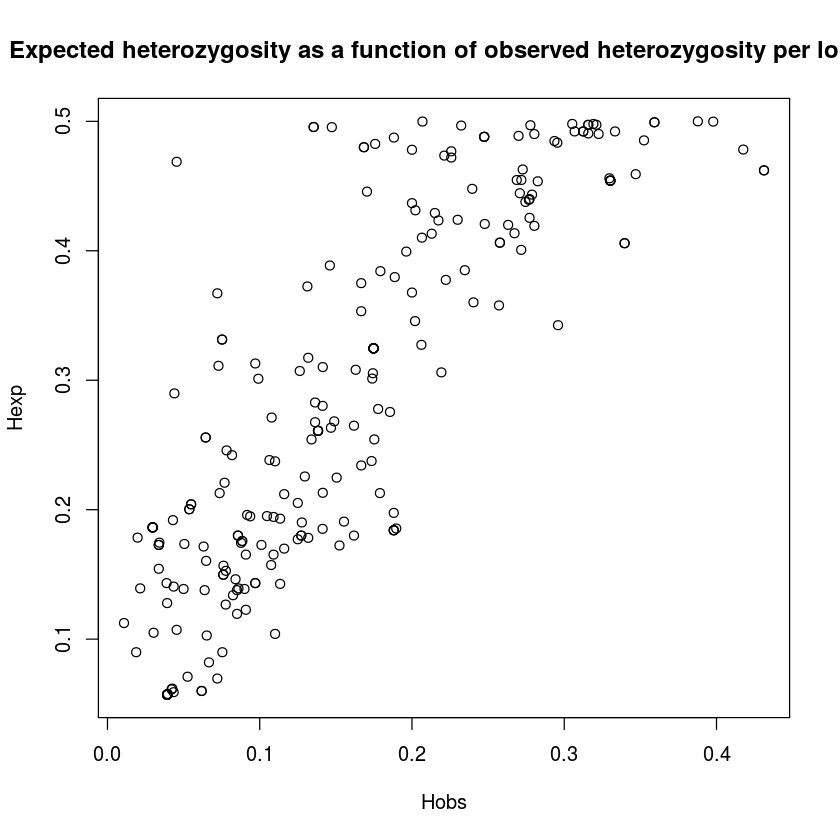

In [31]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [32]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 29.007, df = 1, p-value = 7.212e-08


Significant difference between observed and expected heterozygosity

In [33]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [34]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.167
Hs,0.172
Ht,0.294
Dst,0.123
Htp,0.301
Dstp,0.129
Fst,0.417
Fstp,0.430
Fis,0.030
Dest,0.156


In [35]:
boot <- boot.ppfis(hf.filt,nboot = 1000)
boot5 <- boot.ppfis(hf.filt,nboot = 1000,quant = 0.5)

In [36]:
latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.6131,47.3925,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.95507,37.70867,36.8398194,34.101914,32.602500)

In [37]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino_BC,0.11097021,0.12404255,0.1067,0.0235,0.1929,50.29867
Barkley_BC,0.13035319,0.13574043,0.0369,-0.0718,0.1591,49.01585
Ladysmith_BC,0.17759149,0.13746154,-0.3006,-0.4123,-0.1800,49.01138
Victoria_BC,0.09588936,0.09086809,-0.0574,-0.1352,0.0251,48.43567
Discovery_WA,0.13041277,0.14171064,0.0796,-0.0162,0.1771,47.99780
Liberty_WA,0.08674894,0.10001702,0.1306,-0.0111,0.2582,47.73750
TritonCove_WA,0.11546809,0.09618298,-0.1996,-0.2840,-0.1036,47.61310
NorthBay_WA,0.09951064,0.10457872,0.0495,-0.0421,0.1411,47.39250
Willapa_WA,0.13517447,0.14041702,0.0390,-0.1008,0.1705,46.53239
Netarts_OR,0.17349787,0.17203404,-0.0065,-0.0963,0.0808,45.39116


In [38]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.30060 -0.04155  0.03690  0.01496  0.09315  0.33320 

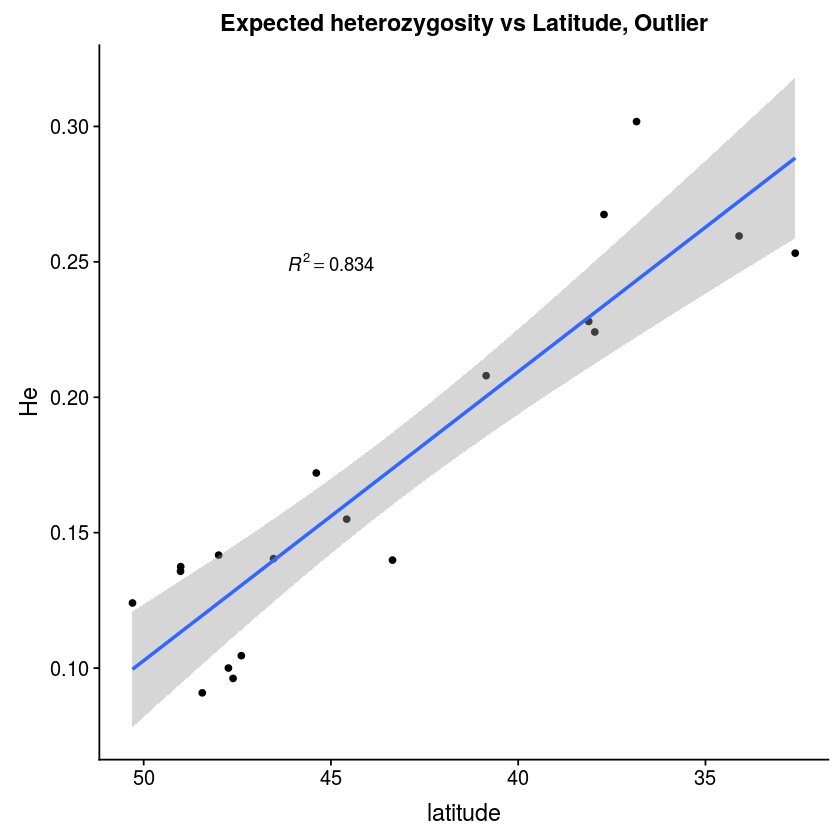

In [39]:
R2 = round(summary(lm(x$He ~ x$latitude))$r.squared, 3)             

ggplot(x, aes(x = latitude, y = He)) + geom_point() + 
geom_smooth(method=lm) + 
ggtitle("Expected heterozygosity vs Latitude, Outlier") +
annotate(geom = "text", label=paste("italic(R^2)==",R2), x=45, y=0.25, parse=T) +
scale_x_reverse()

#### Popgen stats for Regions

Significant difference between observed and expected heterozygosity

In [40]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 3) 

In [41]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.163
Hs,0.187
Ht,0.297
Dst,0.110
Htp,0.319
Dstp,0.132
Fst,0.371
Fstp,0.415
Fis,0.126
Dest,0.163


In [42]:
boot <- boot.ppfis(hf.reg,nboot = 1000)
boot5 <- boot.ppfis(hf.reg,nboot = 1000,quant = 0.5)

In [43]:
nwbc <- hf.filt[which(hf.filt$POP_ID %in% c(1,2)),]
puget <- hf.filt[which(hf.filt$POP_ID %in% c(3:8)),]
willapa <- hf.filt[which(hf.filt$POP_ID %in% c(9,12)),]
oregon <- hf.filt[which(hf.filt$POP_ID %in% c(10,11)),]
Nocal <- hf.filt[which(hf.filt$POP_ID %in% c(13:16)),]
Socal <- hf.filt[which(hf.filt$POP_ID %in% c(17:19)),]

In [44]:
nwbc <- basic.stats(nwbc, digits = 3)
puget <- basic.stats(puget, digits = 3)
willapa <- basic.stats(willapa, digits = 3)
oregon <- basic.stats(oregon, digits = 3)
Nocal <- basic.stats(Nocal, digits = 3)
Socal <- basic.stats(Socal, digits = 3)

In [45]:
fst <- c(nwbc$overall[7],puget$overall[7],willapa$overall[7],oregon$overall[7],Nocal$overall[7],Socal$overall[7])

In [46]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
x <- x[NS,]
cbind(x,fst)

,Ho,He,Fis,ll,hl,fst
NWBC,0.1181234,0.1329660,0.1128,0.0558,0.1709,0.034
Puget+BC,0.1119106,0.1248213,0.1040,0.0564,0.1505,0.132
Willapa,0.1283191,0.1419702,0.0956,-0.0072,0.1886,0.005
Oregon,0.1749064,0.1678894,-0.0429,-0.1124,0.0302,0.023
NoCal,0.2299574,0.2618681,0.1221,0.0756,0.1695,0.112
SoCal,0.2162043,0.2903787,0.2568,0.2028,0.3059,0.067


## Combined
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [2]:
load("../Inputs/OL-c85t10-x45m75-maf025-filt.hf")
load("../Inputs/OL-c85t10-x45m75-maf025-filt.genind")

In [3]:
pop_order <- c("Klaskino_BC","Barkley_BC","Ladysmith_BC","Victoria_BC","Discovery_WA","Liberty_WA","TritonCove_WA","NorthBay_WA","Willapa_WA","Netarts_OR","Yaquina_OR","Coos_OR","Humboldt_CA","Tomales_CA","NorthSanFran_CA","SouthSanFran_CA","Elkhorn_CA","MuguLagoon_CA","SanDiego_CA")


### Pairwise Fst

In [4]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat <- genet.dist(hf.filt, method = "WC84")

In [5]:
gindF.fst.mat.tri <- as.matrix(fst.mat)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-Pop.pwfst",row.names = T,col.names = T)

In [6]:
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [8]:
gindF.fst.mat.tri

,Klaskino_BC,Barkley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.00000000,0.03087810,0.06732062,0.12482971,0.07673666,0.100725304,0.08000489,0.101526328,0.120044862,0.08993875,0.12576975,0.123193431,0.10040418,0.10236493,0.134458250,0.133854493,0.13202839,0.148503432,0.154264413
Barkley_BC,0.03087810,0.00000000,0.05691241,0.13085508,0.07712264,0.104726512,0.08335443,0.107883780,0.129387608,0.09607017,0.13768971,0.131995834,0.10239422,0.09923192,0.131753245,0.128246246,0.12250665,0.137939907,0.144040228
Ladysmith_BC,0.06732062,0.05691241,0.00000000,0.09630475,0.03885793,0.066765830,0.05356138,0.077133365,0.125105213,0.08816815,0.13305755,0.132578336,0.08635402,0.09375521,0.128123624,0.132568152,0.11957153,0.137396119,0.143870002
Victoria_BC,0.12482971,0.13085508,0.09630475,0.00000000,0.09062301,0.088010435,0.05920548,0.092275838,0.133057363,0.11592070,0.15437933,0.141879762,0.12698348,0.13578030,0.166719766,0.181166772,0.16833482,0.184558474,0.190455174
Discovery_WA,0.07673666,0.07712264,0.03885793,0.09062301,0.00000000,0.053722210,0.01955964,0.048610785,0.110349022,0.08576252,0.12774672,0.117243209,0.09818615,0.10980199,0.141977466,0.150603782,0.13986240,0.156215532,0.158709896
Liberty_WA,0.10072530,0.10472651,0.06676583,0.08801044,0.05372221,0.000000000,0.01685697,0.007498053,0.125698139,0.09099852,0.14379807,0.129176729,0.09726956,0.12455314,0.156639125,0.166468783,0.15544977,0.172028770,0.176820404
TritonCove_WA,0.08000489,0.08335443,0.05356138,0.05920548,0.01955964,0.016856968,0.00000000,0.025068392,0.101950605,0.07702193,0.12501754,0.112380895,0.08650378,0.10759226,0.136910662,0.145087474,0.13096649,0.153069805,0.154993702
NorthBay_WA,0.10152633,0.10788378,0.07713337,0.09227584,0.04861079,0.007498053,0.02506839,0.000000000,0.121628667,0.08377030,0.14197398,0.126537429,0.09673463,0.12522575,0.156777469,0.167528167,0.15420724,0.174903904,0.179820606
Willapa_WA,0.12004486,0.12938761,0.12510521,0.13305736,0.11034902,0.125698139,0.10195060,0.121628667,0.000000000,0.06599007,0.09664086,0.001982497,0.10232424,0.11871644,0.132689094,0.145887614,0.13320753,0.153837993,0.161786718
Netarts_OR,0.08993875,0.09607017,0.08816815,0.11592070,0.08576252,0.090998516,0.07702193,0.083770302,0.065990067,0.00000000,0.03110503,0.069584373,0.07785822,0.08898697,0.113973303,0.111846332,0.11147165,0.135977482,0.140987691


In [9]:
#Average pairwise Fst
summary(melted$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07702 0.11238 0.10270 0.13740 0.19046 

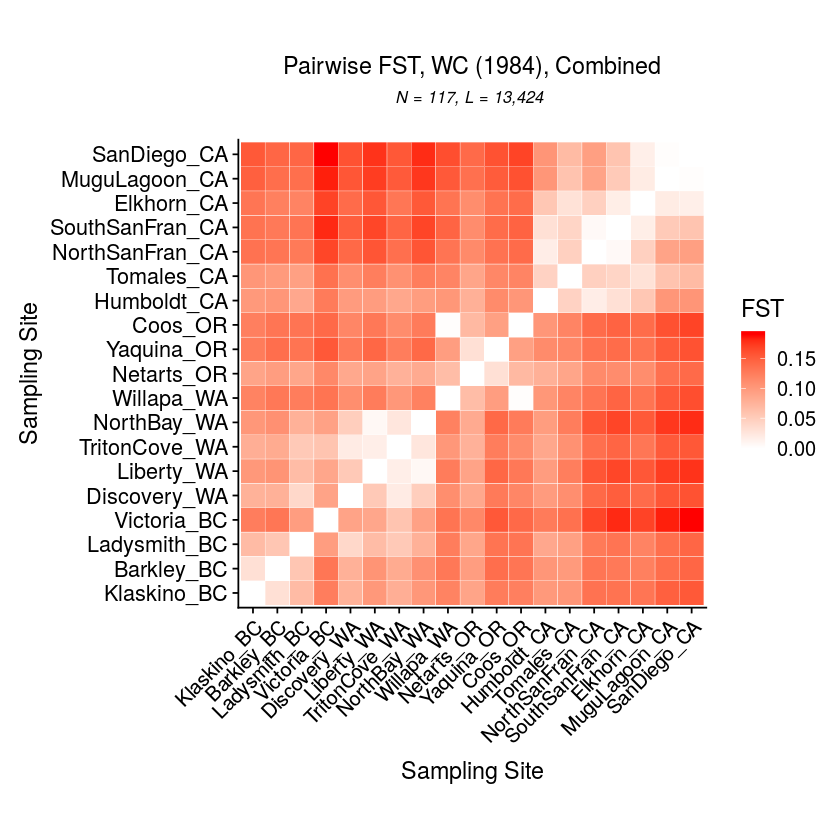

In [10]:
combined <- ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Combined", atop(italic("N = 117, L = 13,424 "), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()
combined

#### Pairwise Fst for Regions

In [11]:
hf.reg <- hf.filt
regions <- c("NW_BC","NW_BC",rep("Puget+BC",6),"Willapa_Coos","Oregon","Oregon","Willapa_Coos",rep("NoCal",3),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), to = regions)

In [8]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg <- genet.dist(hf.reg, method = "WC84")

In [15]:
fst.mat.reg

                  NoCal      NW_BC     Oregon   Puget+BC      SoCal
NW_BC        0.09530460                                            
Oregon       0.08576601 0.09451799                                 
Puget+BC     0.09568923 0.06435994 0.08862757                      
SoCal        0.05151527 0.12908651 0.12548427 0.14682707           
Willapa_Coos 0.10362400 0.11713546 0.07495828 0.09950112 0.14633049

In [17]:
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [18]:
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-Reg.pwfst",row.names = T,col.names = T)

gindF.fst.mat.tri[lower.tri(fst.mat.reg, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [19]:
gindF.fst.mat.tri

,NW_BC,Puget+BC,Willapa_Coos,Oregon,NoCal,SoCal
NW_BC,NA,0.06435994,0.11713546,0.09451799,0.09530460,0.12908651
Puget+BC,NA,NA,0.09950112,0.08862757,0.09568923,0.14682707
Willapa_Coos,NA,NA,NA,0.07495828,0.10362400,0.14633049
Oregon,NA,NA,NA,NA,0.08576601,0.12548427
NoCal,NA,NA,NA,NA,NA,0.05151527
SoCal,NA,NA,NA,NA,NA,NA


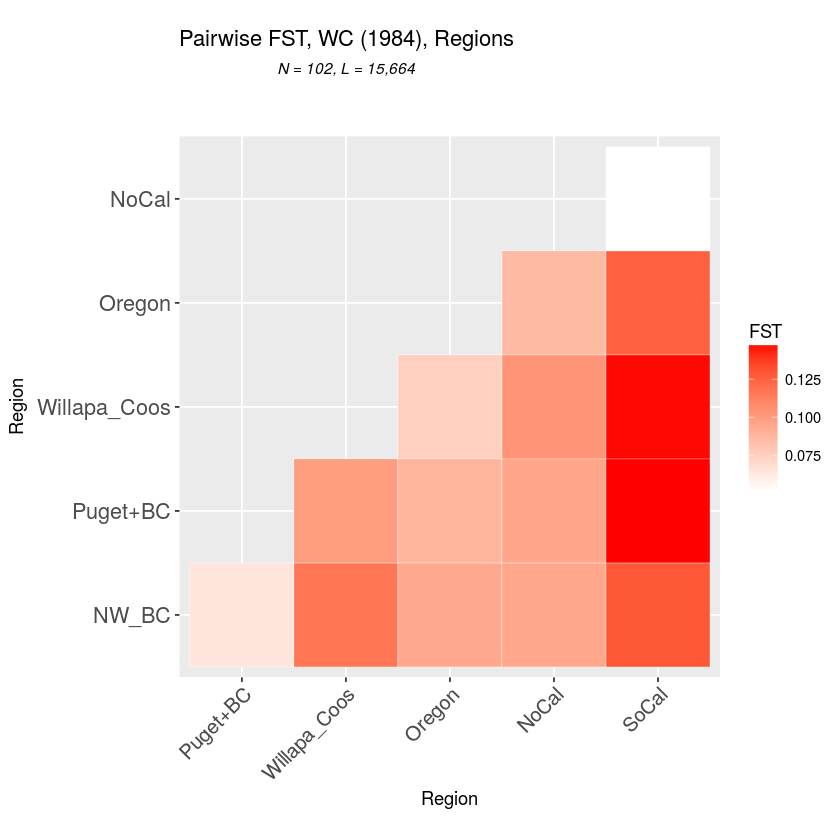

In [20]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Regions", atop(italic("N = 102, L = 15,664"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

### Genetic diversity (observed and expected heterozygosity)

In [12]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

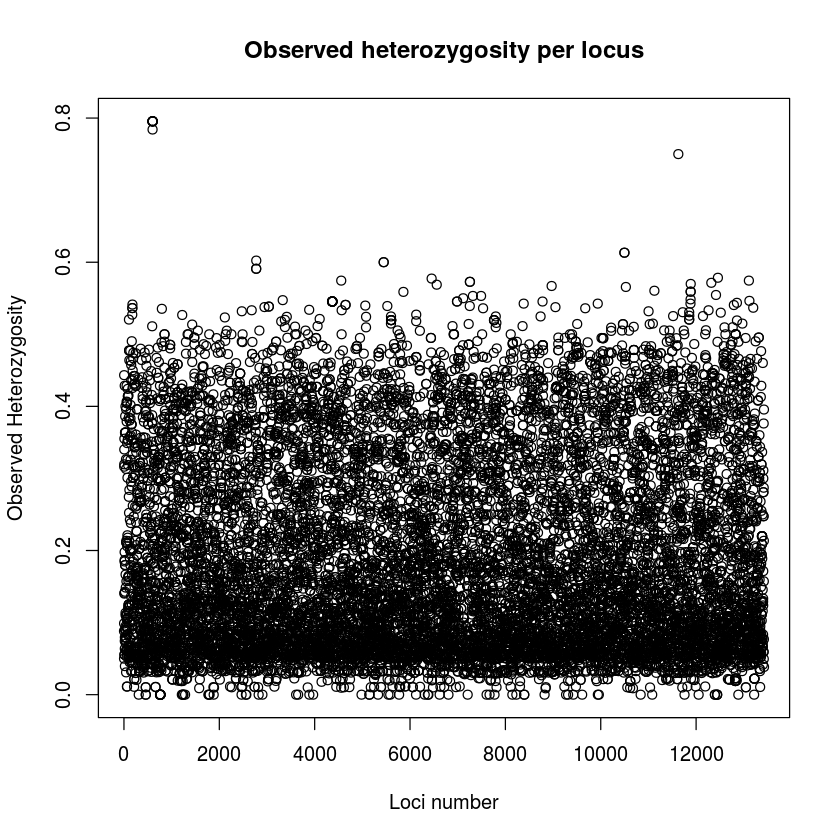

In [13]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

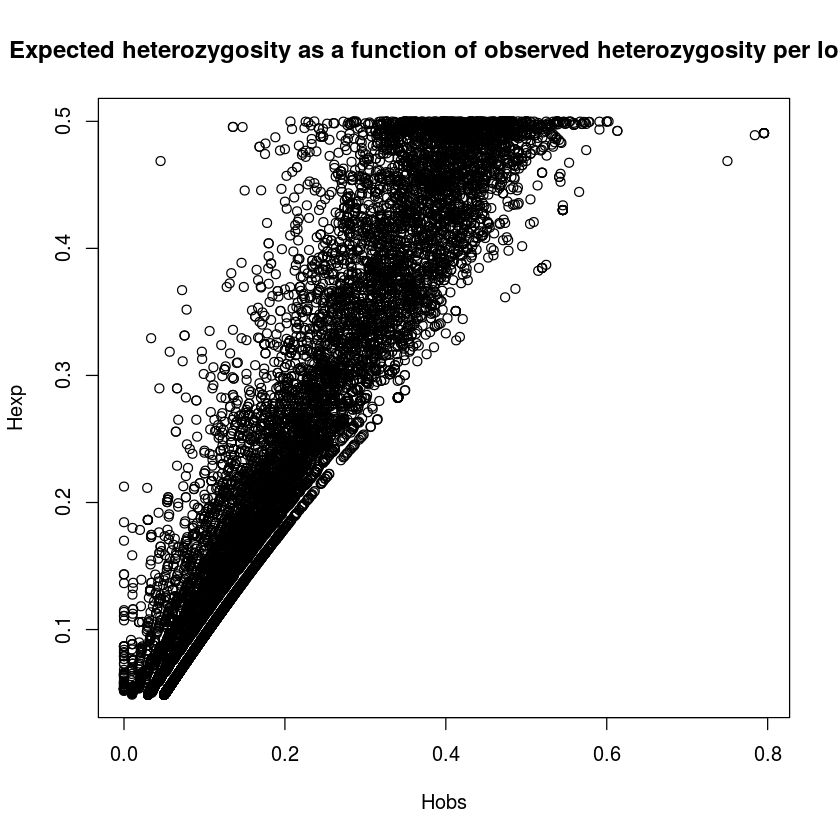

In [14]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [15]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 155.52, df = 1, p-value < 2.2e-16


Significant difference between observed and expected heterozygosity

In [16]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [17]:
names(basicstat)

[1] "n.ind.samp" "pop.freq"   "Ho"         "Hs"         "Fis"       
[6] "perloc"     "overall"

In [18]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.191
Hs,0.202
Ht,0.225
Dst,0.024
Htp,0.227
Dstp,0.025
Fst,0.105
Fstp,0.110
Fis,0.051
Dest,0.031


In [19]:
boot <- boot.ppfis(hf.filt,nboot = 1000)
boot5 <- boot.ppfis(hf.filt,nboot = 1000, quant = 0.5)

In [21]:
latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.6131,47.3925,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.95507,37.70867,36.8398194,34.101914,32.602500)

In [22]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino_BC,0.1771426,0.1902599,0.0686,0.0594,0.0786,50.29867
Barkley_BC,0.1738946,0.1864576,0.0664,0.0540,0.0795,49.01585
Ladysmith_BC,0.1984636,0.1897260,-0.0554,-0.0700,-0.0396,49.01138
Victoria_BC,0.1626649,0.1716547,0.0515,0.0405,0.0631,48.43567
Discovery_WA,0.1701161,0.1809772,0.0593,0.0483,0.0699,47.99780
Liberty_WA,0.1712933,0.1768362,0.0309,0.0194,0.0426,47.73750
TritonCove_WA,0.1754231,0.1816845,0.0336,0.0219,0.0462,47.61310
NorthBay_WA,0.1662634,0.1756018,0.0524,0.0404,0.0634,47.39250
Willapa_WA,0.1696841,0.1798229,0.0556,0.0420,0.0685,46.53239
Netarts_OR,0.1851262,0.1965725,0.0577,0.0459,0.0679,45.39116


In [23]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.09740  0.03135  0.05350  0.04150  0.06285  0.13270 

#### Popgen stats for Regions

In [24]:
#Regions
reg.filt <- stratted.filt

ERROR: Error in mapvalues(pop(reg.filt), from = pop_order, to = regions): `from` and `to` vectors are not the same length.


Significant difference between observed and expected heterozygosity

In [115]:
hw <- hw.test(hf.reg, B = 1000)

ERROR: Error in UseMethod("hw.test"): no applicable method for 'hw.test' applied to an object of class "data.frame"


In [18]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 2) 

In [37]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.19
Hs,0.21
Ht,0.24
Dst,0.02
Htp,0.24
Dstp,0.02
Fst,0.09
Fstp,0.10
Fis,0.10
Dest,0.03


In [19]:
boot <- boot.ppfis(hf.reg,nboot = 500)

In [21]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- colMeans(basicstat$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
x[NS,]

,Ho,He,Fis,ll,hl
NW_BC,0.1807418,0.1993903,0.07128108,0.0851,0.0977
Puget+BC,0.1783293,0.1973544,0.08191545,0.0904,0.0995
Willapa_Coos,0.1767856,0.1902586,0.05211503,0.0614,0.0763
Oregon,0.1906161,0.2049923,0.05201669,0.0606,0.0757
NoCal,0.2114492,0.2370474,0.08380897,0.0994,0.1119
SoCal,0.2248481,0.2592403,0.11530984,0.1275,0.1385
